# Overview

For this project I examine Los Angeles’s Vehicle and Pedestrian Stop Data to better understand policing trends. The data holds valuable information, such as data/time, general location, and race of individuals stopped by police. Dating back to 2010 till present, releasing the dataset was an initiative by the city to promote more transparency between law enforcement agencies and the public. 

The purpose of this project is to analyze a specific region of LA (Topanga) to better understand the trends and identify potentially problematic policing habits. 

Key Findings from this project:

•	Men are pulled over by police more frequently than women

•	Police stops are heightened at night and see their lowest numbers early in the morning

•	2/3 of Police stops are for individuals in vehicles and vehicle pull overs are more likely to result in further action taken by law enforcement

•	The results indicate Blacks & Hispanics have a higher likelihood of law enforcement engaging in post stop activity versus White counterparts. Conversely, Asians are less likely to have a police officer take further action after a stop compared to White counterparts.

Data Source: https://data.lacity.org/Public-Safety/Vehicle-and-Pedestrian-Stop-Data-2010-to-Present/ci25-wgt7


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Vehicle_and_Pedestrian_Stop_Data_2010_to_Present.csv')
data.head()

,Stop Number,Form Reference Number,Sex Code,Descent Code,Descent Description,Stop Date,Stop Time,Officer 1 Serial Number,Officer 1 Division Number,Division Description 1,Officer 2 Serial Number,Officer 2 Division Number,Division Description 2,Reporting District,Stop Type,Post Stop Activity Indicator
0,12984268,27426327,M,B,BLACK,08/06/2016,21:55,47908.0,19,MISSION,NaN,NaN,NaN,1918,PED,N
1,12987768,27429717,F,B,BLACK,08/09/2016,00:10,47544.0,26,VALLEY TRAFFIC,NaN,NaN,NaN,974,VEH,N
2,12987840,27429775,F,W,WHITE,08/09/2016,19:39,59798.0,08,WEST LA,NaN,NaN,NaN,822,VEH,N
3,12991260,27434259,F,A,ASIAN,08/10/2016,20:55,16003.0,08,WEST LA,NaN,NaN,NaN,833,VEH,N
4,12991647,27434592,F,W,WHITE,08/10/2016,20:20,47933.0,19,MISSION,NaN,NaN,NaN,914,PED,Y


In [3]:
#Explore the Data
data['Division Description 1'].unique()

array(['MISSION', 'VALLEY TRAFFIC', 'WEST LA', 'WEST TRAFFIC',
       'SEVENTY-SEVENTH', 'NORTH EAST', 'TOPANGA', 'WEST VALLEY',
       'OLYMPIC', 'SOUTH TRAFFIC', 'CENTRAL TRAFFIC', 'SOUTH EAST',
       'BURGLARY/AUTO THEFT', 'VALLEY BUREAU', 'SOUTH WEST', 'FOOTHILL',
       'NEWTON', 'RAMPART', 'HOLLYWOOD', 'NORTH HOLLYWOOD', 'WILSHIRE',
       'DEVONSHIRE', 'VAN NUYS', 'METROPOLITAN DIVISN', 'WEST BUREAU',
       'CENTRAL', 'PACIFIC', 'HOLLENBECK', 'HARBOR', 'INTERNAL AFFAIRS',
       'UNIFORMED SUPPORT', nan, 'FINANCIAL CRIMES', 'TRANSIT GROUP',
       'GENERAL SERV POLICE', 'DET SUPPORT', 'JUVENILE',
       'VALLEY NARCOTICS', 'COMMISSION INVESTIG', 'COMPLAINT INV BUY',
       'GANG UNIT', 'CENTRAL BUREAU', 'SOUTH BUREAU', 'PERSONNEL ABSENCE',
       'RACR', 'TRAINING DIVISION', 'SID VALLEY', '**UNUSED PIU CODE**',
       'ROBBERY/HOMICIDE', 'OFFICE OF OPERATION', 'INFORMATION TECH',
       'FUGITIVE SECTION', 'NARCOTICS DIVISION', 'CENT BUR JUV NARCS',
       'ANTI-TERRORIST', 'V

In [4]:
data['Sex Code'].unique()

array(['M', 'F', 'T', 'W', 'C'], dtype=object)

In [5]:
data['Sex Code'].value_counts()

M    5699439
F    2109083
T        988
W        789
C        297
Name: Sex Code, dtype: int64

In [6]:
#This study will analyze the area of Topanga and filter sex to only include Male or Female
#Topanga is Census-designated-place known for it's hiking and proximity to upscale cities such as Calabassas, Santa Monica, Malibu, etc...
data =data.loc[data['Division Description 2']=='TOPANGA']
data = data.loc[(data['Sex Code'] =='M') | (data['Sex Code'] =='F')]

In [7]:
data.head()

,Stop Number,Form Reference Number,Sex Code,Descent Code,Descent Description,Stop Date,Stop Time,Officer 1 Serial Number,Officer 1 Division Number,Division Description 1,Officer 2 Serial Number,Officer 2 Division Number,Division Description 2,Reporting District,Stop Type,Post Stop Activity Indicator
29421,8426791,20545535,M,H,HISPANIC,01/24/2011,20:15,49167.0,21,TOPANGA,NaN,21,TOPANGA,2156,VEH,N
41932,8426796,20545539,M,H,HISPANIC,01/24/2011,21:10,49167.0,21,TOPANGA,NaN,21,TOPANGA,2187,VEH,N
98380,8344068,20358656,M,B,BLACK,12/27/2010,17:45,15546.0,21,TOPANGA,NaN,21,TOPANGA,2107,VEH,Y
120279,8344076,20358664,F,B,BLACK,12/27/2010,18:00,15546.0,21,TOPANGA,NaN,21,TOPANGA,2137,VEH,Y
121784,8426793,20545537,F,W,WHITE,01/24/2011,20:55,49167.0,21,TOPANGA,NaN,21,TOPANGA,2189,VEH,N


In [8]:
data.dtypes

Stop Number                       int64
Form Reference Number             int64
Sex Code                         object
Descent Code                     object
Descent Description              object
Stop Date                        object
Stop Time                        object
Officer 1 Serial Number         float64
Officer 1 Division Number        object
Division Description 1           object
Officer 2 Serial Number         float64
Officer 2 Division Number        object
Division Description 2           object
Reporting District               object
Stop Type                        object
Post Stop Activity Indicator     object
dtype: object

In [9]:
#convert time to datetimeformat
data['Stop Time'] = pd.to_datetime(data['Stop Time'])

In [10]:
data.dtypes

Stop Number                              int64
Form Reference Number                    int64
Sex Code                                object
Descent Code                            object
Descent Description                     object
Stop Date                               object
Stop Time                       datetime64[ns]
Officer 1 Serial Number                float64
Officer 1 Division Number               object
Division Description 1                  object
Officer 2 Serial Number                float64
Officer 2 Division Number               object
Division Description 2                  object
Reporting District                      object
Stop Type                               object
Post Stop Activity Indicator            object
dtype: object

In [11]:
#round time variable to nearest hour
data['Stop Time'] = data['Stop Time'].dt.round('H').dt.hour

In [12]:
#Drop repetitive variables not used for analysis
data.head(3)

,Stop Number,Form Reference Number,Sex Code,Descent Code,Descent Description,Stop Date,Stop Time,Officer 1 Serial Number,Officer 1 Division Number,Division Description 1,Officer 2 Serial Number,Officer 2 Division Number,Division Description 2,Reporting District,Stop Type,Post Stop Activity Indicator
29421,8426791,20545535,M,H,HISPANIC,01/24/2011,20,49167.0,21,TOPANGA,NaN,21,TOPANGA,2156,VEH,N
41932,8426796,20545539,M,H,HISPANIC,01/24/2011,21,49167.0,21,TOPANGA,NaN,21,TOPANGA,2187,VEH,N
98380,8344068,20358656,M,B,BLACK,12/27/2010,18,15546.0,21,TOPANGA,NaN,21,TOPANGA,2107,VEH,Y


In [13]:
data = data[['Sex Code','Descent Description','Stop Time','Stop Type','Post Stop Activity Indicator']]

In [14]:
data.head(3)

,Sex Code,Descent Description,Stop Time,Stop Type,Post Stop Activity Indicator
29421,M,HISPANIC,20,VEH,N
41932,M,HISPANIC,21,VEH,N
98380,M,BLACK,18,VEH,Y


In [15]:
#visualize data

M    129814
F     48485
Name: Sex Code, dtype: int64


Text(0.5, 1.0, 'Male v Female Counts')

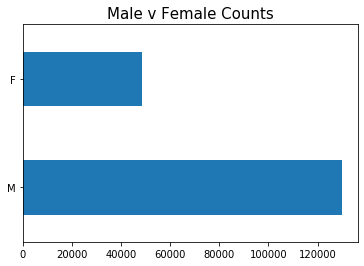

In [16]:
print(data['Sex Code'].value_counts())
data['Sex Code'].value_counts().plot(kind ='barh')
plt.title('Male v Female Counts', fontsize = 15)

HISPANIC           75822
WHITE              62978
BLACK              19702
OTHER              12567
ASIAN               6898
AMERICAN INDIAN      242
MULTI-DESCENTS        90
Name: Descent Description, dtype: int64


Text(0.5, 1.0, 'Race of Individuals Pulled over by Police in Topanga by %')

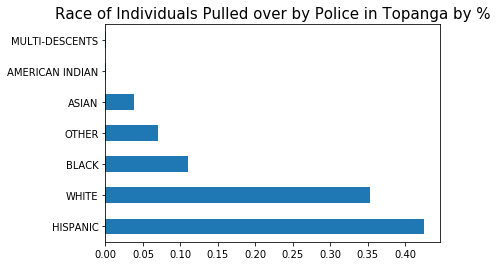

In [17]:
print(data['Descent Description'].value_counts())
data['Descent Description'].value_counts(normalize = 'True').plot(kind ='barh')
plt.title('Race of Individuals Pulled over by Police in Topanga by %', fontsize = 15)

Next, let's have a look at local demographics of the region.

Topanga is a Cenus-designated-place within Los Angeles County. The official population of Topange according to the American Community Survey (ACS) was 7900 in 2019.

Topanga is a popular hiking destination near Malibu,CA so I have also included demographics of LA County for better insight.

In [18]:
Topanga_data = pd.read_excel('Topanga & LA County Demographics.xlsx',sheet_name=0) 
Topanga_data.head()

,Race,Percentage
0,Asian,6.7
1,Hispanic,8.8
2,White,79.7
3,Multi-Racial,3.0
4,Black,1.8


Text(0.5, 1.0, 'Topanga Demographics')

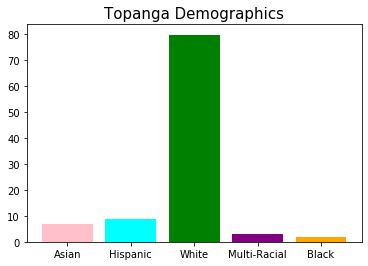

In [19]:
plt.bar(x=Topanga_data.Race,height=Topanga_data.Percentage, color=['pink','cyan','green','purple','orange'])
plt.title('Topanga Demographics',fontsize=15)

Despite Blacks consitituting less than 2% of Topanga's population, they make up more than 10% of the population stopped by law enforcement. 

Over-representation of Hispanics is also visible from this graph

These findings also need to be supplemented by using LA County demographics. This is because Topanga is a local tourist attraction for many of LA County’s residents. Very few people live in Topanga and those that do live there, their homes are situated near neighboring cities.

In [20]:
LA_County_Data = pd.read_excel('Topanga & LA County Demographics.xlsx',sheet_name=1) 
LA_County_Data.head()

,Race,Percentage
0,Asian,14.7
1,Hispanic,47.2
2,White,25.9
3,Multi-Racial,4.1
4,Black,8.1


Text(0.5, 1.0, 'Los Angeles County Demographics')

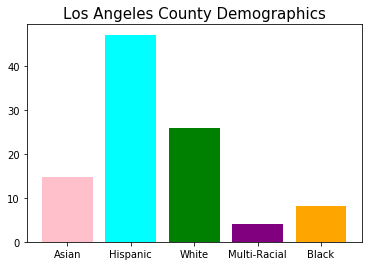

In [21]:
plt.bar(x=LA_County_Data.Race,height=LA_County_Data.Percentage, color=['pink','cyan','green','purple','orange'])
plt.title('Los Angeles County Demographics',fontsize=15)

242 American Indian and 90 Multi Descents in dataset. These individuals will be dropped from dataset due to small number

In [22]:
data = data.loc[(data['Descent Description'] !='AMERICAN INDIAN')]
data = data.loc[(data['Descent Description'] !='MULTI-DESCENTS')]

In [23]:
#The new size of dataset
data.shape

(177967, 5)

In [24]:
#Test to make sure American Indian and MULTI-DESCENTS were removed
data['Descent Description'].value_counts()

HISPANIC    75822
WHITE       62978
BLACK       19702
OTHER       12567
ASIAN        6898
Name: Descent Description, dtype: int64

VEH    66.054943
PED    33.945057
Name: Stop Type, dtype: float64


Text(0.5, 1.0, '% of Individuals Stopped in Vehicle v Pedestrian')

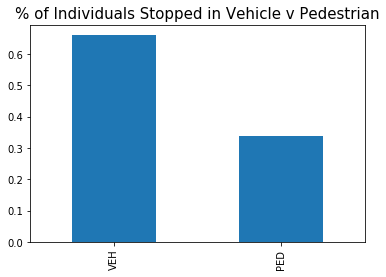

In [25]:
print(data['Stop Type'].value_counts(normalize='True')*100)
data['Stop Type'].value_counts(normalize='True').plot(kind ='bar')
plt.title("% of Individuals Stopped in Vehicle v Pedestrian", fontsize=15 )

2/3 of individuals stopped by police were in a vehicle

Variable identifies whether there was further activity after the stop was made.
N    70.302359
Y    29.697641
Name: Post Stop Activity Indicator, dtype: float64


Text(0.5, 1.0, '% of Stops with further Action Taken')

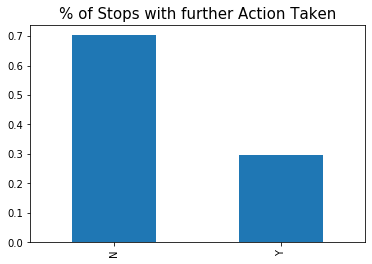

In [26]:
data['Post Stop Activity Indicator'].value_counts(normalize='True').plot(kind ='bar')
print("Variable identifies whether there was further activity after the stop was made.")
print(data['Post Stop Activity Indicator'].value_counts(normalize='True')*100)
plt.title('% of Stops with further Action Taken', fontsize=15)

Text(0.5, 1.0, 'Frequency of Stops throughout the day, Aggregated')

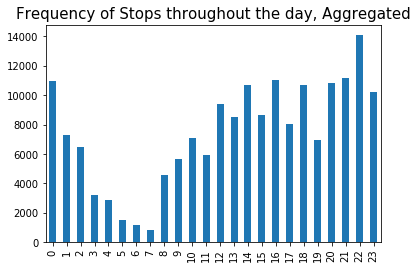

In [27]:
#sort=False because Value_counts default sort=True and we want to view stops throughout the day
data['Stop Time'].value_counts(sort=False).plot(kind ='bar')
plt.title('Frequency of Stops throughout the day, Aggregated', fontsize=15)

From the data above we see stops peak at night time and are at the lowest early in the morning

In [28]:
data.head(3)

,Sex Code,Descent Description,Stop Time,Stop Type,Post Stop Activity Indicator
29421,M,HISPANIC,20,VEH,N
41932,M,HISPANIC,21,VEH,N
98380,M,BLACK,18,VEH,Y



For further analysis, I want to investigate which factors affect the likelihood someone who is pulled over by the police in Topanga has further activity taken against them. I will look investigate three factors based on the data available to me: sex, race, and whether the person was driving or a pedestrian. 

To do this, I will further alter the data by creating dummy variables for the factors listed above.


In [29]:
data= pd.get_dummies(data, columns = ['Sex Code', 'Descent Description','Stop Type','Post Stop Activity Indicator' ])

In [30]:
data.head(3)

,Stop Time,Sex Code_F,Sex Code_M,Descent Description_ASIAN,Descent Description_BLACK,Descent Description_HISPANIC,Descent Description_OTHER,Descent Description_WHITE,Stop Type_PED,Stop Type_VEH,Post Stop Activity Indicator_N,Post Stop Activity Indicator_Y
29421,20,0,1,0,0,1,0,0,0,1,1,0
41932,21,0,1,0,0,1,0,0,0,1,1,0
98380,18,0,1,0,1,0,0,0,0,1,0,1


Next, I will drop the necessary variables in order to not have the dummy variable trap.

In [31]:
data = data.drop(['Stop Time','Sex Code_F','Descent Description_WHITE','Post Stop Activity Indicator_N','Stop Type_PED','Post Stop Activity Indicator_N'], axis =1) 

In [32]:
data.columns

Index(['Sex Code_M', 'Descent Description_ASIAN', 'Descent Description_BLACK',
       'Descent Description_HISPANIC', 'Descent Description_OTHER',
       'Stop Type_VEH', 'Post Stop Activity Indicator_Y'],
      dtype='object')

In [33]:
data.head(3)

,Sex Code_M,Descent Description_ASIAN,Descent Description_BLACK,Descent Description_HISPANIC,Descent Description_OTHER,Stop Type_VEH,Post Stop Activity Indicator_Y
29421,1,0,0,1,0,1,0
41932,1,0,0,1,0,1,0
98380,1,0,1,0,0,1,1


In [34]:
data.describe()

,Sex Code_M,Descent Description_ASIAN,Descent Description_BLACK,Descent Description_HISPANIC,Descent Description_OTHER,Stop Type_VEH,Post Stop Activity Indicator_Y
count,177967.000000,177967.000000,177967.000000,177967.000000,177967.000000,177967.000000,177967.000000
mean,0.728084,0.038760,0.110706,0.426045,0.070614,0.660549,0.296976
std,0.444948,0.193023,0.313768,0.494502,0.256180,0.473524,0.456927
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Prepare data for regression. 
Isolate the dependent variable (Y) Post Stop Activity Indicator_Y (yes)
Independent variables (X): race, sex, Driver (yes)


In [35]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

In [36]:
x = sm.add_constant(X)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 210.712126
         Iterations 6


In [37]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                 
==========================================================================================
Dep. Variable:     Post Stop Activity Indicator_Y   No. Observations:               177967
Model:                                      Logit   Df Residuals:                   177960
Method:                                       MLE   Df Model:                            6
Date:                            Mon, 01 Mar 2021   Pseudo R-squ.:                     inf
Time:                                    00:28:47   Log-Likelihood:            -3.7500e+07
converged:                                   True   LL-Null:                        0.0000
Covariance Type:                        nonrobust   LLR p-value:                     1.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.2070      0.014    -14.337      0.000      -0.235      -0.179
Sex Code_M                       0.2714      0.013     20.948      0.000       0.246       0.297
Descent Description_ASIAN       -0.0756      0.031     -2.460      0.014      -0.136      -0.015
Descent Description_BLACK        0.0401      0.019      2.089      0.037       0.002       0.078
Descent Description_HISPANIC     0.1829      0.013     14.538      0.000       0.158       0.208
Descent Description_OTHER       -0.3580      0.026    -13.883      0.000      -0.409      -0.307
Stop Type_VEH                   -1.5361      0.011   -137.756      0.000      -1.558      -1.514
================================================================================================
"""

# Key Findings:

•	Men are pulled over by police more frequently than women

•	Police stops are heightened at night and see their lowest numbers early in the morning

•	2/3 of Police stops are for individuals in vehicles and vehicle pull overs are more likely to result in further action taken by law enforcement

•	The results indicate Blacks & Hispanics have a higher likelihood of law enforcement engaging in post stop activity versus White counterparts. Conversely, Asians are less likely to have a police officer take further action after a stop compared to White counterparts.

